In [1]:
# import pickle
import pandas as pd
import glob
import os
# import fnmatch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np

In [2]:
mpl.rcParams["text.usetex"] = True
mpl.rcParams["axes.formatter.use_mathtext"] = True

### Optimality Gap vs. Time

In [3]:
path_stem = "demonstrate_results"

# Find the CSV files with names containing "pc=NoPreconditioner"
no_preconditioner_files = glob.glob(os.path.join(path_stem, '*pc=NoPreconditioner*history.csv'))
no_preconditioner_dfs = [pd.read_csv(file) for file in no_preconditioner_files]

# Find the CSV files with names containing "pc=PartialCholesky"
pc_files = glob.glob(os.path.join(path_stem, '*pc=PartialCholesky*history.csv'))
pc_dfs = [pd.read_csv(file) for file in pc_files]

# Find the CSV files with names containing "pc=Nystrom"
nystrom_files = glob.glob(os.path.join(path_stem, '*pc=Nystrom*history.csv'))
nystrom_dfs = [pd.read_csv(file) for file in nystrom_files]

In [4]:
# Find the latest CSV files
latest_no_preconditioner_file = max(no_preconditioner_files, key=os.path.getmtime)
latest_nystrom_file = max(nystrom_files, key=os.path.getmtime)
latest_pc_file = max(pc_files, key=os.path.getmtime)

print("Latest No Preconditioner File:\n", os.path.basename(latest_no_preconditioner_file))
print("Latest Nystrom File:\n", os.path.basename(latest_nystrom_file))
print("Latest PC File:\n", os.path.basename(latest_pc_file))

Latest No Preconditioner File:
 ts=2024-12-09--11:40:53_prob=risk_model_m=50000_n=80000_k=100_pc=NoPreconditioner_rank=0_tol=1e-08_history.csv
Latest Nystrom File:
 ts=2024-12-09--01:37:16_prob=risk_model_m=50000_n=80000_k=100_pc=Nystrom_rank=20_tol=1e-08_history.csv
Latest PC File:
 ts=2024-12-09--17:55:13_prob=risk_model_m=50000_n=80000_k=100_pc=PartialCholesky_rank=20_tol=1e-08_history.csv


In [5]:
# Preconditioner types
preconditioners = ["NoPreconditioner", "PartialCholesky", "Nystrom"]

# Retrieve the latest file for each preconditioner and extract the StartPt_time
startpt_times = {}
for pc in preconditioners:
    files = glob.glob(os.path.join(path_stem, f"*pc={pc}*status.csv"))
    latest_file = max(files, key=os.path.getmtime) if files else None
    if latest_file:
        df = pd.read_csv(latest_file)
        startpt_time = df["StartPt_time"].iloc[0]  # Assuming there's only one row of interest
        startpt_times[pc] = startpt_time
    else:
        startpt_times[pc] = None

# Display the results
for pc, time in startpt_times.items():
    print(f"Latest StartPt_time for {pc}: {time}")


Latest StartPt_time for NoPreconditioner: 936.56487587
Latest StartPt_time for PartialCholesky: 936.56487587
Latest StartPt_time for Nystrom: 936.56487587


In [6]:
filename = os.path.basename(latest_nystrom_file)

# Extract the values of m and n from the filename
m = int(filename.split('_m=')[1].split('_n=')[0])
n = int(filename.split('_n=')[1].split('_k=')[0])

print("Value of m:", m)
print("Value of n:", n)

Value of m: 50000
Value of n: 80000


In [7]:
nys_df = pd.read_csv(latest_nystrom_file)

# Add the start point time to the dataframes
nys_df["total_time (startpt_included)"] = nys_df["cumulative_time"] + startpt_times["Nystrom"]

nys_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time,rho,delta,total_time (startpt_included)
0,0,1.907169e+06,436936.867723,34254.115542,0,0,0.000000,0,0.000000,0.000000,0.000000,8.000000,8.000000,936.564876
1,1,9.535885e+03,2184.699677,3047.800901,6,6,0.000001,20,15.176355,10.184468,26.915214,0.711810,0.711810,963.480090
2,2,4.518981e+01,33.056554,437.700439,10,10,0.000001,20,9.527216,17.354980,55.416485,0.102224,0.102224,991.981361
3,3,9.140500e+00,9404.061770,86.838809,20,22,0.000001,20,7.744128,33.778445,97.743231,0.047650,0.020281,1034.308107
4,4,3.168978e-01,10222.047925,21.185550,78,78,0.000001,20,8.321808,120.982069,227.801888,0.023657,0.004948,1164.366764


In [8]:
noP_df = pd.read_csv(latest_no_preconditioner_file)

# Add the start point time to the dataframes
noP_df["total_time (startpt_included)"] = noP_df["cumulative_time"] + startpt_times["NoPreconditioner"]

noP_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time,rho,delta,total_time (startpt_included)
0,0,1.907169e+06,436936.867723,34254.115542,0,0,0.000000,0,0.000000,0.000000,0.000000,8.000000,8.000000,936.564876
1,1,9.535837e+03,2184.699643,3047.801113,82,83,0.000001,0,0.010055,83.613765,84.678351,0.711810,0.711810,1021.243227
2,2,4.780264e+01,32.782713,437.698309,83,81,0.000001,0,0.006358,85.607057,171.344314,0.102224,0.102224,1107.909189
3,3,9.717967e-01,9458.036811,86.985516,104,101,0.000001,0,0.006256,107.279397,279.181793,0.047673,0.020315,1215.746669
4,4,3.428184e-01,15215.976192,28.855552,617,1025,0.000001,0,0.006102,836.954067,1116.825419,0.026455,0.006739,2053.390295


In [9]:
pc_df = pd.read_csv(latest_pc_file)

# Add the start point time to the dataframes
pc_df["total_time (startpt_included)"] = pc_df["cumulative_time"] + startpt_times["PartialCholesky"]

pc_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time,rho,delta,total_time (startpt_included)
0,0,1.907169e+06,436936.867723,34254.115542,0,0,0.000000,0,0.000000,0.000000,0.000000,8.000000,8.000000,936.564876
1,1,9.535848e+03,2184.699677,3047.800901,3,3,0.000001,20,804.954013,5.273075,815.386861,0.711810,0.711810,1751.951737
2,2,4.775152e+01,33.056588,437.700439,3,3,0.000001,20,782.257427,4.568233,1603.414082,0.102224,0.102224,2539.978958
3,3,9.679059e-01,9404.206321,86.839140,7,6,0.000001,20,1038.485190,8.880050,2651.388754,0.047650,0.020281,3587.953629
4,4,3.082715e-01,10221.952774,21.185598,10,11,0.000001,20,1085.190593,12.854005,3749.972267,0.023657,0.004948,4686.537143


In [10]:
port_fig_path = f"../../plots/portfolio/fig_portfolio_m={m}_n={n}.pdf"
# Make the directory if it does not exist
os.makedirs(os.path.dirname(port_fig_path), exist_ok=True)

In [11]:
# Define custom colors
default_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
colors = {
    'CG-IP-PMM': default_colors[0],
    'Nys-IP-PMM': default_colors[1],
    'Chol-IP-PMM': default_colors[2]
}

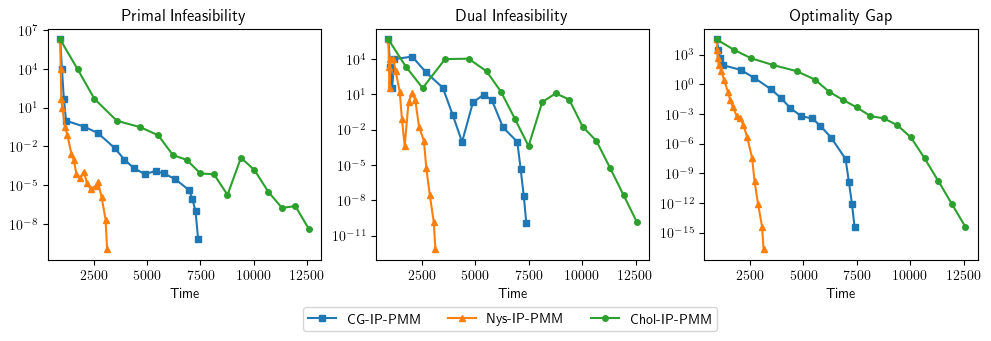

In [12]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(12, 3))

# Primal infeasibility
axes[0].plot(noP_df['total_time (startpt_included)'], noP_df['primal_feasibility'], marker='s', markersize=4, linestyle='-', color = colors['CG-IP-PMM'], label='CG-IP-PMM')
axes[0].plot(nys_df['total_time (startpt_included)'], nys_df['primal_feasibility'], marker='^', markersize=4, linestyle='-', color = colors['Nys-IP-PMM'], label='Nys-IP-PMM')
axes[0].plot(pc_df['total_time (startpt_included)'], pc_df['primal_feasibility'], marker='o', markersize=4, linestyle='-', color = colors['Chol-IP-PMM'], label='Chol-IP-PMM')
axes[0].set_title('Primal Infeasibility')
axes[0].set_xlabel('Time')
axes[0].set_yscale('log')

# Dual infeasibility
axes[1].plot(noP_df['total_time (startpt_included)'], noP_df['dual_feasibility'], marker='s', markersize=4, linestyle='-', color = colors['CG-IP-PMM'], label='CG-IP-PMM')
axes[1].plot(nys_df['total_time (startpt_included)'], nys_df['dual_feasibility'], marker='^', markersize=4, linestyle='-', color = colors['Nys-IP-PMM'], label='Nys-IP-PMM')
axes[1].plot(pc_df['total_time (startpt_included)'], pc_df['dual_feasibility'], marker='o', markersize=4, linestyle='-', color = colors['Chol-IP-PMM'], label='Chol-IP-PMM')
axes[1].set_title('Dual Infeasibility')
axes[1].set_xlabel('Time')
axes[1].set_yscale('log')

# Optimality gap
axes[2].plot(noP_df['total_time (startpt_included)'], noP_df['optimality_gap'], marker='s', markersize=4, linestyle='-', color = colors['CG-IP-PMM'], label='CG-IP-PMM')
axes[2].plot(nys_df['total_time (startpt_included)'], nys_df['optimality_gap'], marker='^', markersize=4, linestyle='-', color = colors['Nys-IP-PMM'], label='Nys-IP-PMM')
axes[2].plot(pc_df['total_time (startpt_included)'], pc_df['optimality_gap'], marker='o', markersize=4, linestyle='-', color = colors['Chol-IP-PMM'], label='Chol-IP-PMM')
axes[2].set_title('Optimality Gap')
axes[2].set_xlabel('Time')
axes[2].set_yscale('log')

# Create a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.51, -0.15))

plt.savefig(port_fig_path, format='pdf', bbox_inches = 'tight')

plt.show()

In [19]:
# Get the last value of total_time for each preconditioner
last_total_time = {}
last_total_time["NoPreconditioner"] = startpt_times["NoPreconditioner"] + noP_df["total_time (startpt_included)"].iloc[-1]
last_total_time["Nystrom"] = startpt_times["Nystrom"] + nys_df["total_time (startpt_included)"].iloc[-1]
last_total_time["PartialCholesky"] = startpt_times["PartialCholesky"] + pc_df["total_time (startpt_included)"].iloc[-1]

# Display the results
for pc, time in last_total_time.items():
    print(f"Last total_time for {pc}: {time}")

# Compute the relative speedup of Nystrom versus NoPreconditioner
relative_speedup_noP = last_total_time["Nystrom"] / last_total_time["NoPreconditioner"]
relative_speedup_pc = last_total_time["Nystrom"] / last_total_time["PartialCholesky"]
print(f"Relative speedup of Nystrom versus NoPreconditioner: {relative_speedup_noP}")
print(f"Relative speedup of Nystrom versus PartialCholesky: {relative_speedup_pc}")

Last total_time for NoPreconditioner: 8325.641410449
Last total_time for Nystrom: 4069.922165946
Last total_time for PartialCholesky: 13505.874106952
Relative speedup of Nystrom versus NoPreconditioner: 0.48884187599505446
Relative speedup of Nystrom versus PartialCholesky: 0.30134459522698
